# Transcriptomics
## Log Transformations and DEG analysis

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July  8th 2021

<hr style="border:1px solid black"> </hr>


In [ ]:
Name:

## 1.2 Prepping the data

To do the DEG analysis, we will be using a R package called Limma Voom. We first need to prep our data so that we have a single file to upload in R.

You were initially handed 6 unstranded RNA-seq samples of MCF7 cells (breast cancer): three of the samples were threated with estradiol (E2). You used STAR to align the reads and do the gene quantification. You now have 6 files with the suffix <code>ReadsPerGene.out.tab</code>.

SRR1012918 -> **treatment**<br>
SRR1012920 -> **treatment**<br>
SRR1012922 -> **treatment**<br>

SRR1012936 -> **control**<br>
SRR1012939 -> **control**<br>
SRR1012942 -> **control**<br>

Publication for the data: https://pubmed.ncbi.nlm.nih.gov/24319002/
<br>STAR documentation: https://physiology.med.cornell.edu/faculty/skrabanek/lab/angsd/lecture_notes/STARmanual.pdf

In [3]:
### Import pandas, numpy and seaborn
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

In [2]:
!ls

deg_analysis.ipynb		     STAR_SRR1012922ReadsPerGene.out.tab
deg_analysis.R.txt		     STAR_SRR1012936ReadsPerGene.out.tab
STAR_SRR1012918ReadsPerGene.out.tab  STAR_SRR1012939ReadsPerGene.out.tab
STAR_SRR1012920ReadsPerGene.out.tab  STAR_SRR1012942ReadsPerGene.out.tab


In [20]:
### Import one DF
fn="STAR_SRR1012918ReadsPerGene.out.tab"
data=pd.read_csv(fn, sep="\t", names = ["Genes", "treatment1", "stranded1", "stranded2"])

In [21]:
data

,Genes,treatment1,stranded1,stranded2
0,N_unmapped,4211944,4211944,4211944
1,N_multimapping,0,0,0
2,N_noFeature,812921,9187413,9390931
3,N_ambiguous,1484530,410100,369058
4,ENSG00000223972,1,1,0
...,...,...,...,...
60674,ENSG00000271254,209,98,111
60675,ENSG00000275405,0,0,0
60676,ENSG00000275987,0,0,0
60677,ENSG00000277475,0,0,0


In [3]:
### Keep gene rows and stranded counts
data=data.loc[4:60679]
data

,Genes,treatment1,stranded1,stranded2
4,ENSG00000223972,1,1,0
5,ENSG00000227232,1,1,0
6,ENSG00000278267,0,0,0
7,ENSG00000243485,0,0,0
8,ENSG00000284332,0,0,0
...,...,...,...,...
60674,ENSG00000271254,209,98,111
60675,ENSG00000275405,0,0,0
60676,ENSG00000275987,0,0,0
60677,ENSG00000277475,0,0,0


In [22]:
### Import all data into one DF
data=data.iloc[4:60679, 0:2]
data.head()
# loc is for the names so i use "", iloc is for the index so i can use the number

,Genes,treatment1
4,ENSG00000223972,1
5,ENSG00000227232,1
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [50]:
### Import the 2nd data just like the firts
fn_tmp = "STAR_SRR1012920ReadsPerGene.out.tab"
data_tmp =pd.read_csv(fn, sep="\t", names = ["Genes", "treatment2", "stranded1", "stranded2"])
data_tmp=data_tmp.iloc[4:60679, 0:2]


In [34]:
##merge by the genes the first and the second and call them treatment 1 and treatment 2
data.merge(data_tmp, on="Genes")

,Genes,treatment1,treatment2
0,ENSG00000223972,1,1
1,ENSG00000227232,1,1
2,ENSG00000278267,0,0
3,ENSG00000243485,0,0
4,ENSG00000284332,0,0
...,...,...,...
60670,ENSG00000271254,209,209
60671,ENSG00000275405,0,0
60672,ENSG00000275987,0,0
60673,ENSG00000277475,0,0


In [23]:
fn_list = ["STAR_SRR1012920ReadsPerGene.out.tab", "STAR_SRR1012922ReadsPerGene.out.tab", 
             "STAR_SRR1012936ReadsPerGene.out.tab", "STAR_SRR1012939ReadsPerGene.out.tab", 
             "STAR_SRR1012942ReadsPerGene.out.tab"]

label_list = ["Treatment2", "Treatment3", "Control1", "Control2", "Control3"]

for i in range(len(fn_list)):
    fn_tmp = fn_list[i]
    data_tmp =pd.read_csv(fn_tmp, sep="\t", names = ["Genes", label_list[i], "stranded1", "stranded2"])
    data_tmp=data_tmp.iloc[4:60679, 0:2]
    data = data.merge(data_tmp, on="Genes")
    

In [24]:
data.head()

,Genes,treatment1,Treatment2,Treatment3,Control1,Control2,Control3
0,ENSG00000223972,1,0,0,0,0,0
1,ENSG00000227232,1,0,0,1,0,1
2,ENSG00000278267,0,0,0,0,0,0
3,ENSG00000243485,0,0,0,0,0,0
4,ENSG00000284332,0,0,0,0,0,0


In [ ]:
##def imp_data(file_name):
  #  for data in file_name
#fn_tmp = "STAR_SRR1012920ReadsPerGene.out.tab"
#data_tmp =pd.read_csv(fn, sep="\t", names = ["Genes", "treatment2", "stranded1", "stranded2"])
#data_tmp=data_tmp.iloc[4:60679, 0:2]

In [25]:
### Export the dataframe to a tsv
data.to_csv("gene_counts.tsv", sep="\t", header=True, index=False)

## Explore the data

In [7]:
### Calculate the average ratio of Treatment1 vs. Control1
### Is there a problem?
data["treatment1"]/data["Control1"]
#yes bcause we are dividing with 0

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
60666    1.161111
60667         NaN
60668         NaN
60669         NaN
60670         NaN
Length: 60671, dtype: float64

In [31]:
### Calculate the average log10 ratio of Treatment1 vs. Control1. 
## adding a small value : 0,01 to avoid de NaN messages when doing the log transformation
np.log10(data.treatment1+0.01)- np.log10(data.Control1+0.01)
data

,Genes,treatment1,Treatment2,Treatment3,Control1,Control2,Control3,Treatment1_Log10,Treatment2_Log10,Treatment3_Log10,Control1_Log10,Control2_Log10,Control3_Log10
0,ENSG00000223972,1,0,0,0,0,0,0.004321,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000
1,ENSG00000227232,1,0,0,1,0,1,0.004321,-2.000000,-2.00000,0.004321,-2.000000,0.004321
2,ENSG00000278267,0,0,0,0,0,0,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000
3,ENSG00000243485,0,0,0,0,0,0,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000
4,ENSG00000284332,0,0,0,0,0,0,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60670,ENSG00000271254,209,251,285,180,160,229,2.320167,2.399691,2.45486,2.255297,2.204147,2.359854
60671,ENSG00000275405,0,0,0,0,0,0,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000
60672,ENSG00000275987,0,0,0,0,0,0,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000
60673,ENSG00000277475,0,0,0,0,0,0,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000


In [27]:
##the average
(np.log10(data.treatment1+0.01)- np.log10(data.Control1+0.01)).mean()

0.05458222350956533

In [28]:
np.log10(data.treatment1)- np.log10(data.Control1)

/u/sakhof/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0             inf
1        0.000000
2             NaN
3             NaN
4             NaN
           ...   
60670    0.064874
60671         NaN
60672         NaN
60673         NaN
60674         NaN
Length: 60675, dtype: float64

In [29]:
### Add columns to the df with log10-transformed data
col_list = ["Treatment1_Log10", "Treatment2_Log10", "Treatment3_Log10", "Control1_Log10",
           "Control2_Log10", "Control3_Log10"]

for i in range(len(col_list)):
    data[col_list[i]]=np.log10(data.iloc[:, i+1] + 0.01)


In [17]:
##data=data.drop(columns = "treatment1_log10_transformed")

In [30]:
data.head()

,Genes,treatment1,Treatment2,Treatment3,Control1,Control2,Control3,Treatment1_Log10,Treatment2_Log10,Treatment3_Log10,Control1_Log10,Control2_Log10,Control3_Log10
0,ENSG00000223972,1,0,0,0,0,0,0.004321,-2.0,-2.0,-2.000000,-2.0,-2.000000
1,ENSG00000227232,1,0,0,1,0,1,0.004321,-2.0,-2.0,0.004321,-2.0,0.004321
2,ENSG00000278267,0,0,0,0,0,0,-2.000000,-2.0,-2.0,-2.000000,-2.0,-2.000000
3,ENSG00000243485,0,0,0,0,0,0,-2.000000,-2.0,-2.0,-2.000000,-2.0,-2.000000
4,ENSG00000284332,0,0,0,0,0,0,-2.000000,-2.0,-2.0,-2.000000,-2.0,-2.000000


<AxesSubplot:ylabel='Count'>

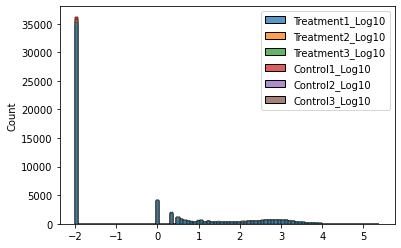

In [38]:
### Plot a control and a treament distribution of the expression values
data_tmp = data[col_list]
sns.histplot(data_tmp, multiple = "stack")


In [ ]:
## barr in -2 is because log10(0+0,1) = -2, meaning its not expressed

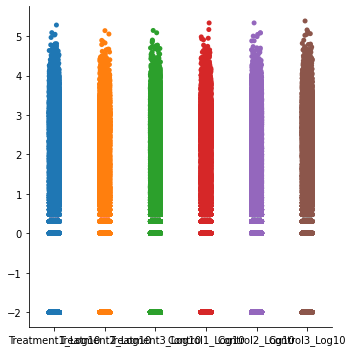

In [39]:
### Plot the log10 expression values of all samples
### What do you observe?
data_tmp = data[col_list]
sns.catplot(data=data_tmp)
sns.despine()

## DEG analysis

In [15]:
### Upload DEG analysis, Tableau 1
dg = "DEG_analysis_results.tsv"
data=pd.read_table(dg, sep="\t")
data.head()

,genes,logFC,AveExpr,t,P_Value,adj_P_Val,B
0,ENSG00000147255,-4.212719,5.036796,-32.540700,1.016408e-07,0.001858,8.565757
1,ENSG00000151892,-2.530967,5.702625,-31.925158,1.133285e-07,0.001858,8.615937
2,ENSG00000213673,-4.730086,-2.601906,-31.415734,1.242076e-07,0.001858,5.558399
3,ENSG00000074527,1.339166,7.366807,31.233154,1.284020e-07,0.001858,8.644275
4,ENSG00000151224,-5.105304,-2.408434,-29.574816,1.752000e-07,0.001858,5.565237


In [5]:
### Explore the data
##top 20 genes with the highest values
##filter to look at the data sets

In [37]:

#data.loc[:,"adj_P_Val"] <= 0.05

In [13]:
pval_subset = data[data.loc[:,"adj_P_Val"] <= 0.05] #juste les pvalue plus petit que 0.05
logFC_subset = pval_subset[np.abs(pval_subset.loc[:, "logFC"]) >= 3.0] #avec abs.logFC plus grand que 3


In [14]:
logFC_subset.shape

(114, 7)

In [25]:
import matplotlib.pyplot as plt

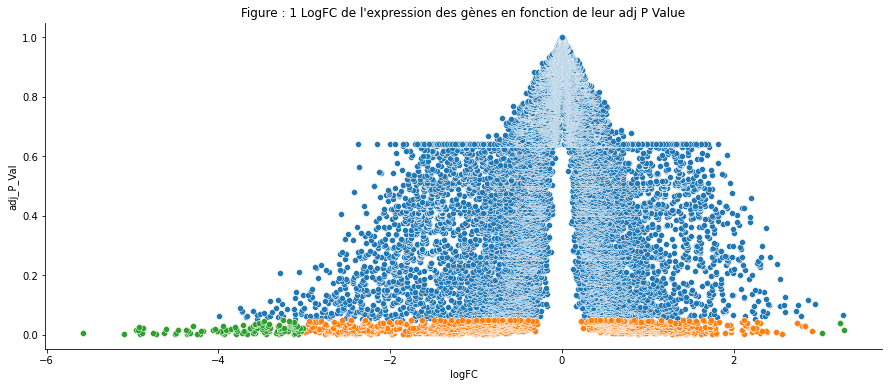

In [47]:
fig = plt.figure(figsize =( 15,6))
p = sns.scatterplot(data=data, x="logFC", y="adj_P_Val")
p = sns.scatterplot(data=pval_subset, x="logFC", y="adj_P_Val")
p = sns.scatterplot(data=logFC_subset, x="logFC", y="adj_P_Val")

plt.title("Figure : 1 LogFC de l'expression des gènes en fonction de leur adj P Value")
sns.despine()

In [38]:
#Tableau 2 : Les 10 premiers gènes avec des p_val <= 0.05
# et avec des logFC plus petit que -3 ou plus grand que 3

logFC_subset.sort_values(by="adj_P_Val", ascending=True).head(10)

,genes,logFC,AveExpr,t,P_Value,adj_P_Val,B
0,ENSG00000147255,-4.212719,5.036796,-32.540700,1.016408e-07,0.001858,8.565757
2,ENSG00000213673,-4.730086,-2.601906,-31.415734,1.242076e-07,0.001858,5.558399
4,ENSG00000151224,-5.105304,-2.408434,-29.574816,1.752000e-07,0.001858,5.565237
5,ENSG00000233476,-3.076129,1.454574,-29.328500,1.837454e-07,0.001858,7.167099
6,ENSG00000258846,-4.912654,-2.504849,-27.710728,2.537913e-07,0.002136,5.415413
7,ENSG00000164128,-3.297861,5.723449,-27.207929,2.816568e-07,0.002136,7.838057
10,ENSG00000196620,-3.790997,-3.067579,-25.371643,4.190505e-07,0.002172,4.934992
11,ENSG00000228450,-3.930667,-2.997315,-25.242743,4.313568e-07,0.002172,4.975601
13,ENSG00000134830,-3.120377,3.427453,-24.360260,5.279973e-07,0.002172,7.071054
15,ENSG00000196208,-4.249825,7.865723,-24.012824,5.728726e-07,0.002172,7.230332


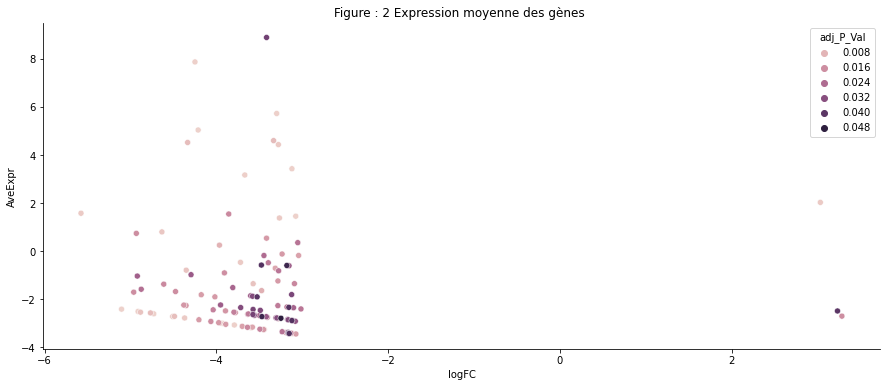

In [48]:
fig = plt.figure(figsize =( 15,6))
p = sns.scatterplot(data=logFC_subset, y="AveExpr", x="logFC", hue="adj_P_Val")
plt.title("Figure : 2 Expression moyenne des gènes ")

sns.despine()

In [ ]:
### Considering the contexte, make an hypothesis

# Hypothesis : the treatment will have an effect on genes included in cell proliferation

In [49]:
### Confirm (or infirm your hypothesis) 

## I've sorted the 10 more statistical significant genes based on their logFC,
## p_value and ajd_p_value : as seen in the Tableau 2. It's well illustrated
## in the Figure 1: "LogFC de l'expression des gènes en fonction de leur adj P Value".
## According to http://useast.ensembl.org/, the 10 first genes are IGSF1, SLC25AP3
## MAT1A, which don't seem to be part of cell proliferation